# Ahmed Abd-Elsalam Muhammed Afify

## Optimization Labs And HomeWorks:

In [127]:
# Importing Required Libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Vanilla Gradient Descent:

In [128]:
# 1) Loading the data:
arr = np.genfromtxt('Insurance_in_Sweden.csv', delimiter=',', skip_header=True)
x = arr[:,0].reshape(-1,1)
y = arr[:,1].reshape(-1,1)

In [129]:
print(x.T)
print(y.T)

[[108.  19.  13. 124.  40.  57.  23.  14.  45.  10.   5.  48.  11.  23.
    7.   2.  24.   6.   3.  23.   6.   9.   9.   3.  29.   7.   4.  20.
    7.   4.   0.  25.   6.   5.  22.  11.  61.  12.   4.  16.  13.  60.
   41.  37.  55.  41.  11.  27.   8.   3.  17.  13.  13.  15.   8.  29.
   30.  24.   9.  31.  14.  53.  26.]]
[[392.5  46.2  15.7 422.2 119.4 170.9  56.9  77.5 214.   65.3  20.9 248.1
   23.5  39.6  48.8   6.6 134.9  50.9   4.4 113.   14.8  48.7  52.1  13.2
  103.9  77.5  11.8  98.1  27.9  38.1   0.   69.2  14.6  40.3 161.5  57.2
  217.6  58.1  12.6  59.6  89.9 202.4 181.3 152.8 162.8  73.4  21.3  92.6
   76.1  39.9 142.1  93.   31.9  32.1  55.6 133.3 194.5 137.9  87.4 209.8
   95.5 244.6 187.5]]


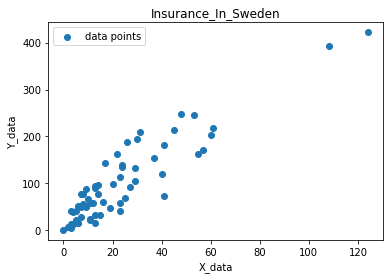

In [130]:
plt.scatter(x, y, label='data points')
plt.xlabel('X_data')
plt.ylabel('Y_data')
plt.title('Insurance_In_Sweden')
plt.legend()
plt.show()

In [131]:
# 2) Implementing the Batch_GD:

# initialize the parameters:
m = len(x)
Xs = np.concatenate((np.ones((m,1)), x), axis=1)
thetas = np.ones((Xs.shape[1],1))
yhat = np.zeros((m,1))

# Hyper_parameters:
alpha = 0.001
epoches = 10

# Lists to store values of epoches:
loss_lst = []
theta_0 = []
theta_1 = []
yhat_lst = []

# Implementing Iterations:
for i in range(epoches):
    yhat = Xs@ thetas
    error = yhat - y
    J_loss = (1/(2*m)) * np.sum(error**2)
    grd = (1/m) * (Xs.T @ error).reshape(-1,1)
    thetas = thetas - alpha*grd

    loss_lst.append(J_loss)
    theta_0.append(thetas[0])
    theta_1.append(thetas[1])
    yhat_lst.append(yhat)

In [132]:
# Printing the finale values if thetas:
print(f'Theta_0 = {thetas[0]}')
print(f'Theta_1 = {thetas[1]}')

Theta_0 = [1.15642634]
Theta_1 = [3.82058194]


In [133]:
# calculating the final Hypothesis based on final theta values:
yhat = Xs@ thetas

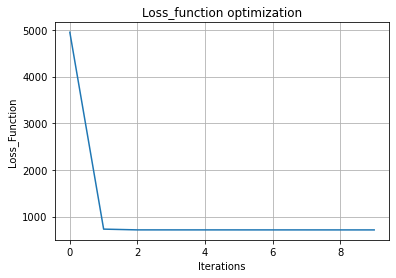

In [134]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

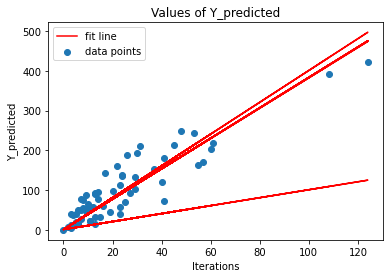

In [135]:
# Plotting All regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
for i in range(epoches-1):
    plt.plot(x,yhat_lst[i], color='r')
plt.plot(x,yhat_lst[i+1], label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.show()

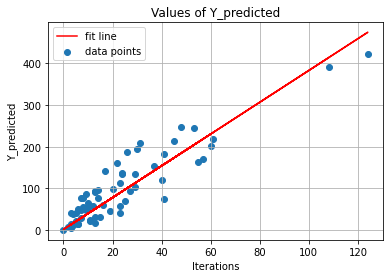

In [136]:
# Plotting the best fit regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
plt.plot(x,yhat, label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.grid()
plt.show()

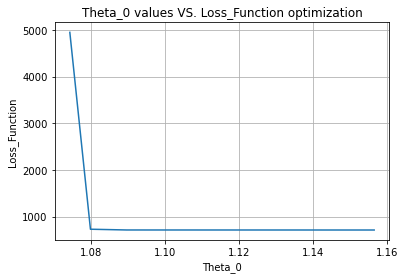

In [137]:
# plotting the value of theta_0 based on the loss_function optimization:
plt.plot(theta_0, loss_lst)

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')
plt.title('Theta_0 values VS. Loss_Function optimization')
plt.grid()
plt.show()

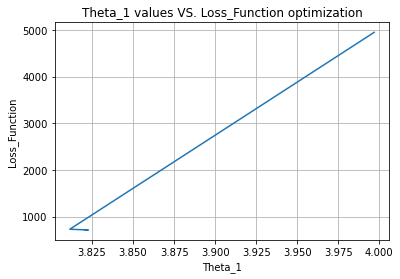

In [138]:
# plotting the value of theta_1 based on the loss_function optimization:
plt.plot(theta_1, loss_lst)

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')
plt.title('Theta_1 values VS. Loss_Function optimization')
plt.grid()
plt.show()

In [139]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres = np.sum((y-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.8094364468348196


___
## Multivariate GD:

In [140]:
# 1) Loading the data:
arr = np.genfromtxt('california_housing_train.csv', delimiter=',', skip_header=1)
X_variables = arr[:,:8]
y = arr[:,-1].reshape(-1,1)

In [141]:
# normalizing the input data X_variables
from sklearn.preprocessing import scale

In [142]:
X_variables = scale(X_variables, axis=0)
y = scale(y, axis=0)

In [143]:
# In the Xs we put all the input as a matrix and concatenated the value of X0 that is multiplied by theta_0
Xs = np.concatenate((np.ones((arr.shape[0],1)), X_variables), axis=1)

In [144]:
print(Xs[:1,:])
print('\n', Xs.shape)

[[ 1.          2.619365   -0.67152023 -1.07967114  1.36169494  1.76420407
  -0.36118401 -0.07599796 -1.25254316]]

 (17000, 9)


In [145]:
print(y[:5])
print('\n', y.shape)

[[-1.21055773]
 [-1.09674535]
 [-1.04846131]
 [-1.15451375]
 [-1.22262874]]

 (17000, 1)


In [224]:
# 2) Implementing the Stochastic_GD:

# initialize the parameters:
m = Xs.shape[0]
thetas = np.ones((Xs.shape[1],1))
yhat = np.zeros((m,1))

# Hyper_parameters:
alpha = 0.095
epoches = 500

# Lists to store values of epoches:
loss_lst = []
theta_0 = []
theta_1 = []

# Implementing Iterations:
for i in range(epoches):
    yhat = Xs@ thetas
    error = yhat - y
    J_loss = (1/(2*m)) * np.sum(error**2)
    grd = (1/m) * (Xs.T @ error).reshape(-1,1)
    thetas = thetas - alpha*grd

    loss_lst.append(J_loss)
    theta_0.append(thetas[0])
    theta_1.append(thetas[1])
    yhat_lst.append(yhat)

In [225]:
# Printing the finale values if thetas:
print(f'Theta values = \n{thetas}')

Theta values = 
[[-2.13010163e-13]
 [-6.22622710e-01]
 [-6.66876859e-01]
 [ 1.35909320e-01]
 [-2.13965223e-01]
 [ 3.48501307e-01]
 [-3.89107919e-01]
 [ 2.95267314e-01]
 [ 6.89621538e-01]]


In [226]:
# calculating the final Hypothesis based on final theta values:
yhat = Xs@ thetas

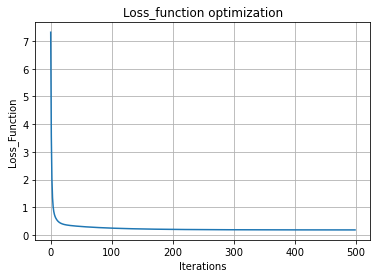

In [227]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

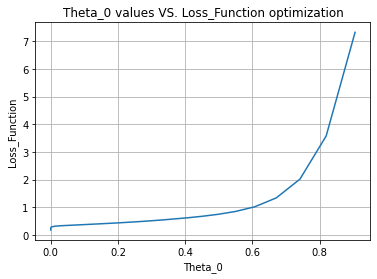

In [228]:
# plotting the value of theta_0 based on the loss_function optimization:
plt.plot(theta_0, loss_lst)

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')
plt.title('Theta_0 values VS. Loss_Function optimization')
plt.grid()
plt.show()

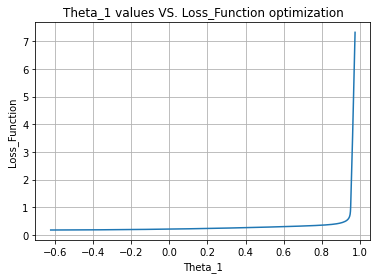

In [229]:
# plotting the value of theta_1 based on the loss_function optimization:
plt.plot(theta_1, loss_lst)

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')
plt.title('Theta_1 values VS. Loss_Function optimization')
plt.grid()
plt.show()

In [230]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres = np.sum((y-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.6392185751368926
